In [2]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = open("/home/sangram/AdvancedPython/cluster.txt").read().split('\n')

#Vectorize
count_vect = CountVectorizer(max_df=0.9,min_df=25,analyzer='word',stop_words='english') #Scikit-learn function to vectorize using Counts of words
count_matrix = count_vect.fit_transform(data)

# convert to Numpy array
numpy_matrix = count_matrix.toarray()
# Remove the row containing all zero 
numpy_matrix1 = numpy_matrix[~np.all(numpy_matrix == 0, axis = 1)]

In [5]:
Z = linkage(numpy_matrix1,method='complete',metric='cosine',optimal_ordering=False)

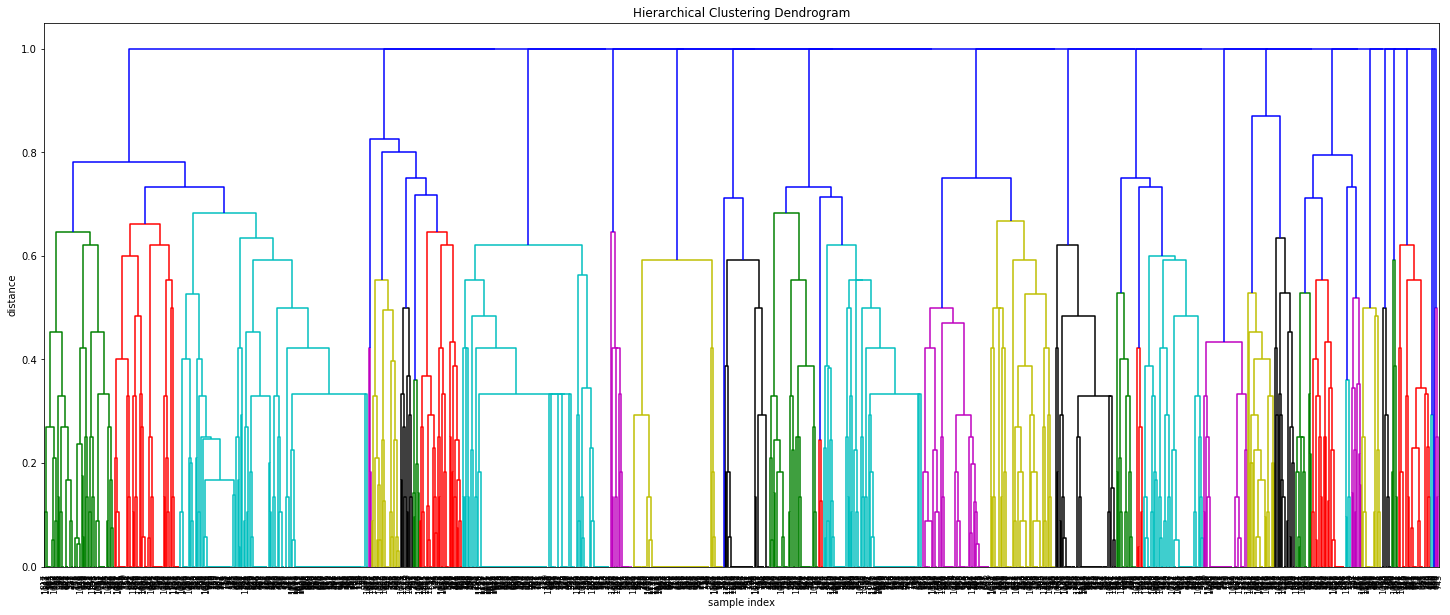

In [7]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
fig1 = plt.gcf()
plt.show()
# plt.draw()
fig1.savefig('full_dendogram_CompleteLinkage.png',dpi=100)

In [37]:
n_clusters = 32

In [48]:
max_d = 0.733
clusters = fcluster(Z, max_d, criterion='distance')
np.unique(clusters)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int32)

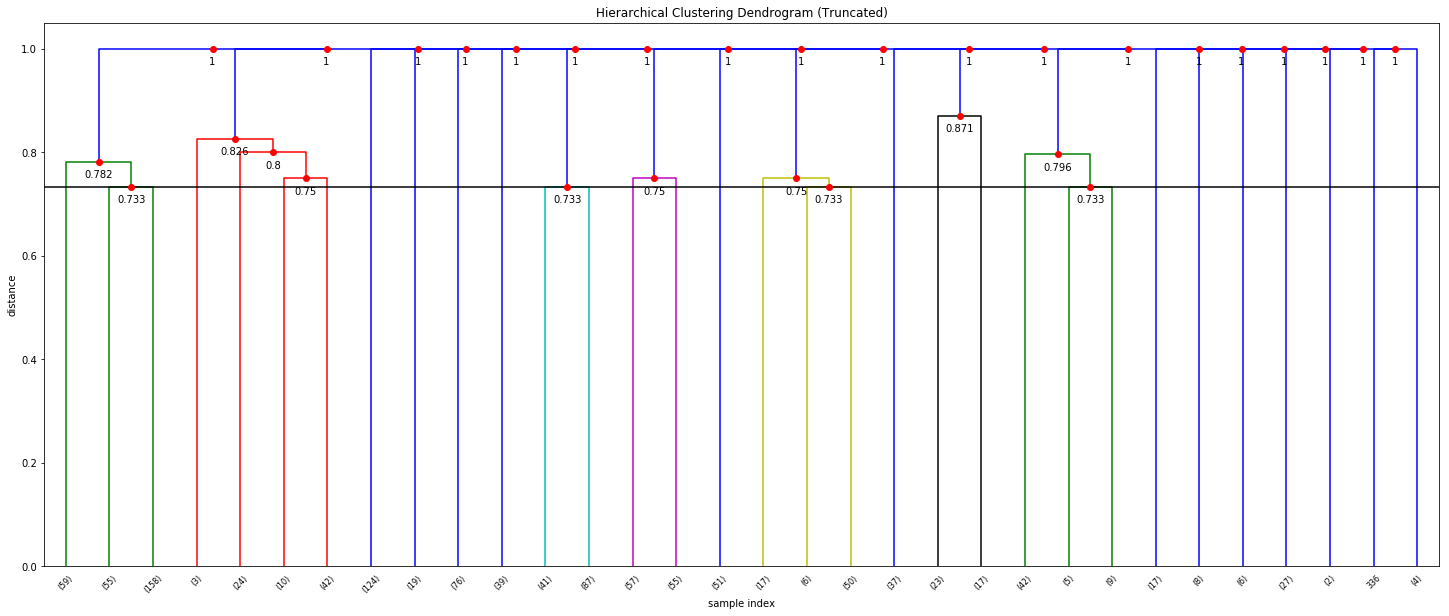

In [53]:
def augmented_dendrogram(*args, **kwargs):
    plt.figure(figsize=(25, 10))
    plt.xlabel('sample index')
    plt.ylabel('distance')
    plt.title('Hierarchical Clustering Dendrogram (Truncated)')
    plt.axhline(y=0.733, color='k', linestyle='-') #Plot horizontal cut off line
    ddata = dendrogram(*args, **kwargs)
    # Plot cluster points
    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
           
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')
    return ddata


ddata = augmented_dendrogram(Z,
                   color_threshold=1,
                   p=n_clusters,
                   truncate_mode='lastp',
                   )

fig1 = plt.gcf()
plt.show()
# plt.draw()
fig1.savefig('truncated_dendogram_Complete_Linkage.png', dpi=100)

In [50]:
def interactive_complete(n_clusters):
    
    ddata = augmented_dendrogram(Z,
                   color_threshold=1,
                   p=n_clusters,
                   truncate_mode='lastp',
                   )

    fig1 = plt.gcf()
    plt.show()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interactive_plot = interactive(interactive_complete, n_clusters=(20,40,1))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=30, description='n_clusters', max=40, min=20), Output()), _dom_classes=('widget-interact',))

In [39]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
clusters2 = fcluster(Z, n_clusters , criterion='maxclust')

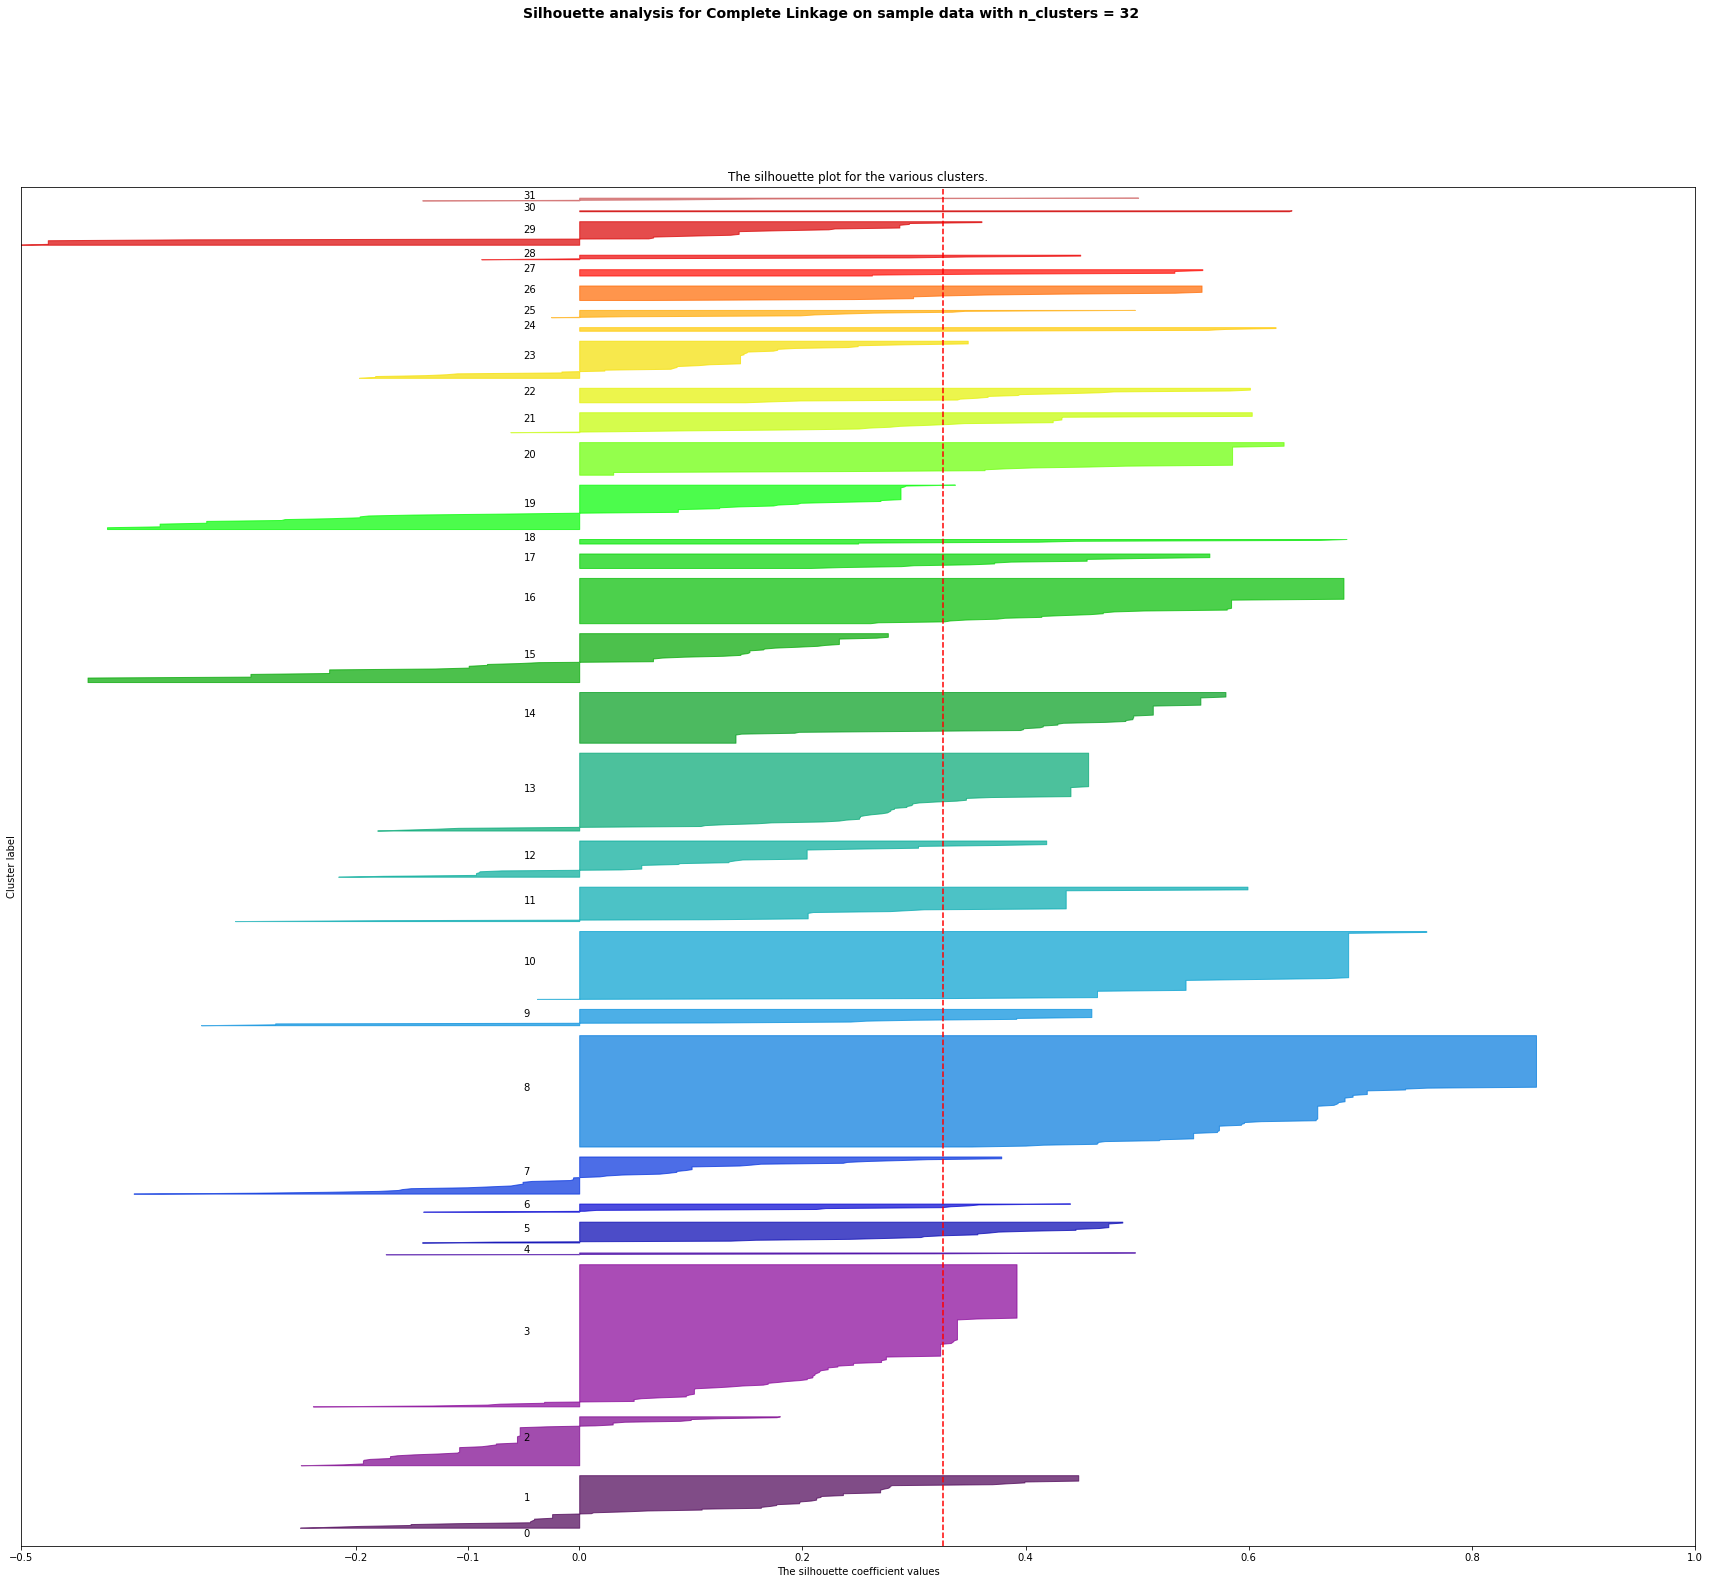

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

clusters2 = fcluster(Z, n_clusters , criterion='maxclust')
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(numpy_matrix1 , clusters2, metric='cosine')
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(numpy_matrix1, clusters2,metric='cosine')

#np.unique(clusters2)

fig, ax = plt.subplots(figsize=(30, 25)) # set size
#fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax.set_xlim([-0.5, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax.set_ylim([0, numpy_matrix1.shape[0] + (n_clusters + 1) * 10])

    


#print(sample_silhouette_values)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clusters2 == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', lw=0, 
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for Complete Linkage on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

In [41]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(numpy_matrix1))
c

0.63320506804805865